In [13]:
# Data split

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_dir = 'data/train/'
val_dir = 'data/val/'

# all data is in the train directory
# lets separate it

def getListData():
    global list_train_pos
    list_train_pos = os.listdir(train_dir+'positive')
    global list_train_neg
    list_train_neg = os.listdir(train_dir+'negative')
    global list_val_pos
    list_val_pos = os.listdir(val_dir+'positive')
    global list_val_neg 
    list_val_neg = os.listdir(val_dir+'negative')

# get directory content 
getListData()

if len(list_val_pos) == 0 or len(list_val_neg) == 0:
    train_pos, val_pos = np.split(list_train_pos, [int(len(list_train_pos) * 0.8)])
    for img in val_pos :
        os.rename('data/train/positive/'+img, 'data/val/positive/'+img)
    train_neg, val_neg = np.split(list_train_neg, [int(len(list_train_neg) * 0.8)])
    for img in val_neg :
        os.rename('data/train/negative/'+img, 'data/val/negative/'+img)

# get new content in the directories
getListData()


train neg
117
117
train pos
337
337
val pos
85
85
val neg
30
30


Training
number of negative images :  117
number of positive images :  337
'%' of negative images :  0.2577092511013216
'%' of positive images :  0.7422907488986784


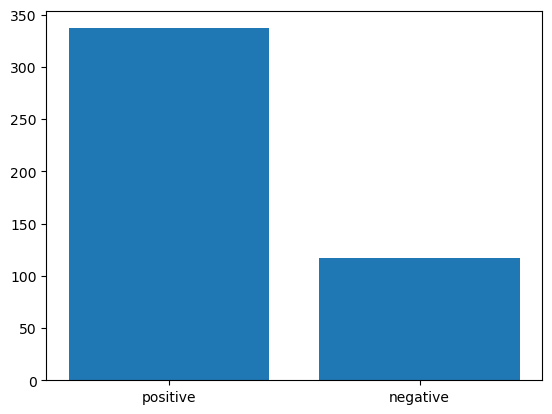

Validation
number of negative images :  30
number of positive images :  85
'%' of negative images :  0.2608695652173913
'%' of positive images :  0.7391304347826086


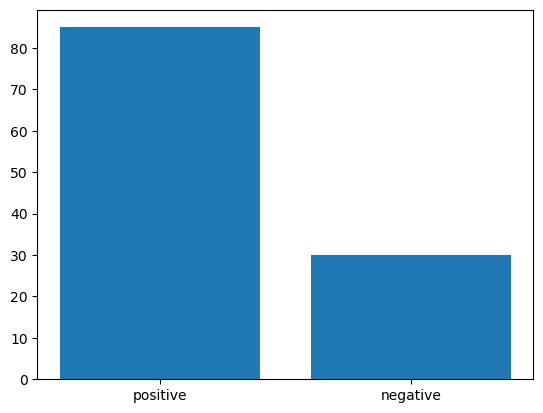

In [14]:
# Data analysis

print('Training')

len_train_pos = len(list_train_pos)
len_train_neg = len(list_train_neg)
total_train = len_train_neg + len_train_pos

print("number of negative images : ", len_train_neg)
print("number of positive images : ", len_train_pos)
print("\'%' of negative images : ", len_train_neg/total_train)
print("\'%' of positive images : ", len_train_pos/total_train)

labels = np.array(['positive', 'negative'])
values = np.array([len_train_pos, len_train_neg])

plt.bar(labels, values)
plt.show()


print('Validation')

len_val_pos = len(list_val_pos)
len_val_neg = len(list_val_neg)
total_val = len_val_neg + len_val_pos

print("number of negative images : ", len_val_neg)
print("number of positive images : ", len_val_pos)
print("\'%' of negative images : ", len_val_neg/total_val)
print("\'%' of positive images : ", len_val_pos/total_val)

labels = np.array(['positive', 'negative'])
values = np.array([len_val_pos, len_val_neg])

plt.bar(labels, values)
plt.show()


In [27]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 150
batch_size = 30

train_imgen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_imgen = ImageDataGenerator(rescale=1./255)

train_gen = train_imgen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),  # All images will be resized to 150x150
    batch_size=batch_size,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

val_gen = val_imgen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),  # All images will be resized to 150x150
    batch_size=batch_size,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)



Found 454 images belonging to 2 classes.


Found 115 images belonging to 2 classes.


In [28]:
# CNN BUILDING
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# input feature map
img_input = layers.Input(shape=(image_size, image_size, 3))

conv1 = layers.Conv2D(16, 3, activation='relu')(img_input)
conv1 = layers.MaxPooling2D(2)(conv1)

conv2 = layers.Conv2D(32, 3, activation='relu')(conv1)
conv2 = layers.MaxPooling2D(2)(conv2)

conv3 = layers.Conv2D(64, 3, activation='relu')(conv2)
conv3 = layers.MaxPooling2D(2)(conv3)

feature_map = layers.Flatten()(conv3)

conn_layer = layers.Dense(512, activation='relu')(feature_map)

conn_layer = layers.Dropout(0.5)(conn_layer)

output = layers.Dense(1, activation='sigmoid')(conn_layer)

model = Model(img_input, output)
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['acc', 'auc']
              )


In [29]:
model.fit(
    train_gen,
    epochs = 20,
    validation_data = val_gen,
    verbose = 2
)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 - 21s - 1s/step - acc: 0.7026 - auc: 0.4867 - loss: 1.1743 - val_acc: 0.7391 - val_auc: 0.6353 - val_loss: 0.6312
Epoch 2/20
16/16 - 19s - 1s/step - acc: 0.7423 - auc: 0.5665 - loss: 0.5954 - val_acc: 0.7391 - val_auc: 0.6604 - val_loss: 0.5942
Epoch 3/20
16/16 - 18s - 1s/step - acc: 0.7423 - auc: 0.5088 - loss: 0.5887 - val_acc: 0.7391 - val_auc: 0.6090 - val_loss: 0.5684
Epoch 4/20
16/16 - 18s - 1s/step - acc: 0.7423 - auc: 0.4841 - loss: 0.5922 - val_acc: 0.7391 - val_auc: 0.6039 - val_loss: 0.5697
Epoch 5/20
16/16 - 19s - 1s/step - acc: 0.7423 - auc: 0.5280 - loss: 0.5805 - val_acc: 0.7391 - val_auc: 0.6210 - val_loss: 0.5683
Epoch 6/20
16/16 - 19s - 1s/step - acc: 0.7423 - auc: 0.5295 - loss: 0.5739 - val_acc: 0.7391 - val_auc: 0.6149 - val_loss: 0.6620
Epoch 7/20
16/16 - 19s - 1s/step - acc: 0.7423 - auc: 0.5150 - loss: 0.5992 - val_acc: 0.7391 - val_auc: 0.6476 - val_loss: 0.5693
Epoch 8/20
16/16 - 18s - 1s/step - acc: 0.7423 - auc: 0.4839 - loss: 0.5817 - val_acc: 0.7391 

Text(0.5, 1.0, 'AUC')

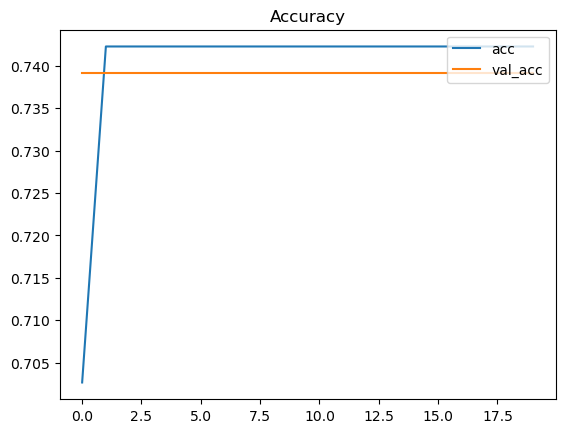

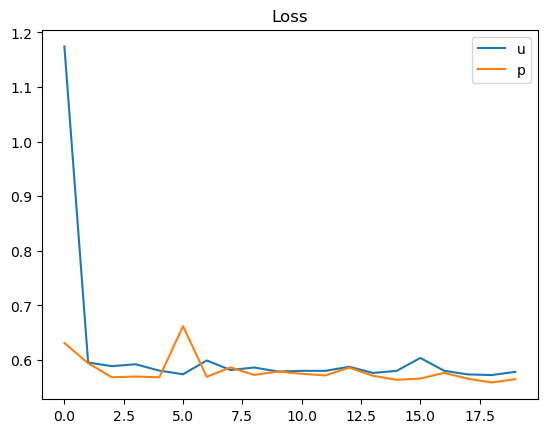

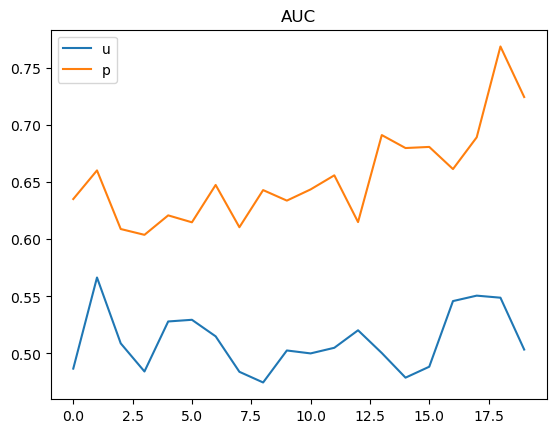

In [30]:
# Evaluate results

acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

auc = model.history.history['auc']
val_auc = model.history.history['val_auc']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend(loc = 'upper right')
plt.title('Accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend('upper right')
plt.title('Loss')
plt.figure()

plt.plot(epochs, auc)
plt.plot(epochs, val_auc)
plt.legend('upper right')
plt.title('AUC')


In [31]:
model.save('sickle_cell_cnn_73.keras')

In [54]:
# Prediction on test dataset
test_dir = 'data/test/'

test_list = os.listdir(test_dir)
labels = ["positive" if  "BloodImage" in filename else "negative" for filename in test_list] 

test_data = pd.DataFrame({"filename": test_list, "label": labels})

print(test_data.head())

test_imgen = ImageDataGenerator(rescale=1./255)

test_gen = test_imgen.flow_from_dataframe(test_data, 
                                                directory = test_dir,
                                                x_col= 'filename',
                                                y_col= 'label',
                                                batch_size = 20,
                                                class_mode = "binary",
                                                target_size = (image_size,image_size),
                                                )

# predict
result = model.predict(
    test_gen,
    batch_size = 20,
    verbose = 2
)

y_pred = np.argmax(result, axis = 1)
y_true = test_gen.labels

# evaluate
loss,acc = model.evaluate(test_gen, batch_size = 20, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)


                                            filename     label
0  BloodImage_00245_jpg.rf.a71213da99ea469a62e316...  positive
1  unnamed--22-_jpg.rf.4d6050afb122de8fe953d5e9b9...  negative
2  BloodImage_00263_jpg.rf.1396810c9240e398fae2cb...  positive
3  sickle_cells_high_jpg.rf.85443d1a227839e5a807d...  negative
4  BloodImage_00141_jpg.rf.b334c1553632459d339736...  positive
Found 92 validated image filenames belonging to 2 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 - 0s - 55ms/step


ValueError: too many values to unpack (expected 2)